REAL-WORLD DATA WRANGLING

PROBLEM STATEMENT

Businesses rely on Customer Relationship Management (CRM) systems to identify, track, and close sales opportunities effectively. 
This project aims to analyze sales opportunities based on historical data to improve decision-making and optimize sales performance.

Reseacrh Question:
How can sales agent performance, account segmentation, and product contributions be evaluated to optimize revenue and align offerings with 
high-performing sectors?

The objectives:
1. Evaluate the performance of sales agents based on metrics like closed deals and revenue generated.
2. Segment sectors based on their total revenue contributions to identify high-performing industries and optimize resource allocation.
3. Evaluate product performance to identify those contributing the most to revenue and pinpoint underperforming ones.
4. Evaluate the completeness and quality of CRM data to ensure accurate tracking of opportunities.

Dataset:
This dataset captures detailed records of customer interactions, sales activities, and opportunities managed through a company's CRM system. 
It serves as a resource for analyzing sales processes, uncovering trends, and developing predictive models to enhance decision-making and 
sales performance.

GATHER THE DATA

Data Gathering Methods used:
1. Download data manually:
This involves visiting a website or source, locating the desired data file (e.g., CSV, Excel), and downloading it directly onto a local device. 
It is straightforward but can be time-consuming and inefficient for large or frequently updated datasets.

Programmatically downloading files:
This method uses code or scripts (e.g., Python's requests module) to automate the download of data files from a specific URL. It is efficient for 
handling repetitive downloads and ensures consistency when collecting large volumes of data.

Gather data by accessing APIs:
APIs (Application Programming Interfaces) allow direct programmatic interaction with a data source to retrieve specific information in a structured 
format (e.g., JSON, XML). This method is dynamic, scalable, and well-suited for gathering real-time or frequently updated data.

Datasets used:
Part of the CRM-Sales-Opportunites dataset in Kaggle
1. Accounts: I chose the Accounts dataset for its detailed account-level information, which helps analyze customer demographics, uncover 
sales patterns, and refine account-specific strategies. 

Variables:

Account: 
This represents the client or organization involved in the sales opportunity. It is crucial for tracking performance, analyzing 
trends, and grouping data by client for effective decision-making.

Sector:
This indicates the industry or domain (e.g., Technology, Healthcare) of the account. Understanding the sector helps analyze performance, 
identify patterns, and develop targeted marketing and sales strategies.

Year_established:
This refers to the year the account was founded. This provides insights into the organization's maturity and stability, influencing how 
sales strategies are tailored to suit their growth stage.

Revenue:
This variable shows the account’s annual income. It is a key metric for assessing financial capacity, prioritizing high-value accounts, 
and segmenting clients based on size and financial strength.

Employees:
This specifies the number of employees in the organization. This indicates the size and resource capacity of the account, helping shape sales
strategies to address their unique needs.

Office_location:
This denotes the geographical location of the account’s headquarters or primary office. This variable aids in regional analysis, tailoring 
market strategies, and ensuring compliance with local regulations.

Subsidiary_of:
This identifies the parent company of the account, if applicable. This information reveals ownership structures, supports cross-selling 
opportunities, and provides insight into decision-making hierarchies.

2. Sales-pipeline: I chose this dataset for its sales pipeline details, offering insights into processes, performance, and outcomes to 
analyze trends and optimize deal closures.

Variables:

Opportunity_id:
This represents a unique identifier for each sales opportunity. This ensures each transaction is distinct, facilitating precise tracking, 
analysis, and reporting of sales activities.

Sales_agent:
This indicates the salesperson responsible for the transaction. It helps evaluate individual agent performance, assign accountability, and 
optimize resource allocation in the sales process.

Product:
This refers to the product or service associated with the sales opportunity. Understanding product-level data aids in analyzing demand, 
identifying top-performing items, and refining sales strategies.

Account:
This represents the client or organization tied to the sales opportunity. This variable is essential for tracking client-specific trends, 
grouping related transactions, and assessing account performance over time.

Deal_stage:
This indicates the current phase of the sales opportunity (e.g., Prospecting, Engaging, Won, Loss). It provides insights into pipeline progression, helps 
prioritize deals, and supports forecasting revenue.

Engage_date:
The date when the sales opportunity was first initiated. This variable is critical for measuring sales cycle durations, evaluating engagement
efficiency, and identifying seasonal trends in deal initiation.

Close_date:
The date when the sales opportunity was successfully closed or terminated. This helps track deal completion times, measure sales efficiency, 
and analyze trends in deal closures.

Close_value:
This represents the monetary value of the closed opportunity. This is a key metric for assessing revenue contribution, prioritizing high-value 
deals, and forecasting financial outcomes.


To start this project, I import the relevant packages for data wrangling and analysis while also installing 
the Kaggle library to access datasets. It sets up the necessary tools for efficient data analysis and 
external data sourcing.

In [7]:
# download packages
import pandas as pd
import numpy as np
import requests
import os
import webbrowser
!python -m pip install kaggle==1.6.17

In [8]:
pd.read_csv

<function pandas.io.parsers.readers.read_csv(filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]', *, sep: 'str | None | lib.NoDefault' = <no_default>, delimiter: 'str | None | lib.NoDefault' = None, header: "int | Sequence[int] | None | Literal['infer']" = 'infer', names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>, index_col: 'IndexLabel | Literal[False] | None' = None, usecols: 'list[HashableT] | Callable[[Hashable], bool] | None' = None, dtype: 'DtypeArg | None' = None, engine: 'CSVEngine | None' = None, converters: 'Mapping[Hashable, Callable] | None' = None, true_values: 'list | None' = None, false_values: 'list | None' = None, skipinitialspace: 'bool' = False, skiprows: 'list[int] | int | Callable[[Hashable], bool] | None' = None, skipfooter: 'int' = 0, nrows: 'int | None' = None, na_values: 'Sequence[str] | Mapping[str, Sequence[str]] | None' = None, keep_default_na: 'bool' = True, na_filter: 'bool' = True, verbose: 'bool' = False, skip_blan

GATHER THE DATA

Programmically download the data that is part of a zipped folder

In [11]:
#make directory
CRM_Sales_Opportunities = 'Sales_opportunities_2012'
if not os.path.exists(CRM_Sales_Opportunities):
    os.makedirs(CRM_Sales_Opportunities)

In [12]:
# access the url in a web browser
url = "https://www.kaggle.com/datasets/innocentmfa/crm-sales-opportunities"

In [13]:
# create an http Get request for sales opportunities
response = requests.get(url)

In [14]:
# raise an exception for a request resulting in an error
response.raise_for_status()

In [15]:
# define the filepath
file_path = os.path.join(CRM_Sales_Opportunities, url.split('/')[-1])

In [16]:
# print the file path
print(file_path)

Sales_opportunities_2012/crm-sales-opportunities


In [17]:
print(CRM_Sales_Opportunities)

Sales_opportunities_2012


In [18]:
#write in binary mode
with open(file_path, mode = 'wb') as file:
    file.write(response.content)

Gather the Dataset by accessing kaggle API

In [20]:
# Import key package
import os
from kaggle.api.kaggle_api_extended import KaggleApi

In [21]:
# create an API object and authenticate with the Kaggle API using the credentials from kaggle.json
api = KaggleApi()
api.authenticate()

In [22]:
# Set the Kaggle dataset URL and destination folder
dataset = "https://www.kaggle.com/datasets/innocentmfa/crm-sales-opportunities"
destination = "CRM_Sales_Opportunities"

In [23]:
# Download the dataset using the Kaggle API
os.system(f'kaggle datasets download -d {"https://www.kaggle.com/datasets/innocentmfa/crm-sales-opportunities"} -p {"sales_reviews_2012"} --unzip')

Invalid dataset specification https://www.kaggle.com/datasets/innocentmfa/crm-sales-opportunities


256

In [24]:
print(dataset)

https://www.kaggle.com/datasets/innocentmfa/crm-sales-opportunities


Assess Zipped File

In [26]:
# unzip files
import zipfile

with zipfile.ZipFile('CRM_Opportunities', "r") as zip_ref:
    zip_ref.extractall('CRM_Sales_Opportunities')

In [27]:
# Path to the zip file
zip_file_path = 'sales_reviews_2012/crm-sales-opportunities.zip'

ASSESS THE DATA

Data Quality Issues:

1. Accuracy 
2. Completeness
3. Validity
4. Consistency

Data Tidyness Issues:

1. Inadequate column_name  
2. Spelling mistake
3. Multiple Observational Units in a Single Table

In [30]:
import pandas as pd

In [31]:
# load Accounts datasets downloaded manually from the CRM_Sales_Opportunities zipped folder
accounts = pd.read_csv('Accounts .csv')

In [32]:
# load Sales_pipeline datasets downloaded manually from the CRM_Sales_Opportunities zipped folder
sales_pipeline = pd.read_csv('Sales_pipeline.csv')

In [33]:
# view the first few roles of the accounts dataframe
accounts.head()

,Account,Sector,Year_established,Revenue,Employees,Office_location,Subsidiary_of
0,Acme Corporation,technolgy,1996,1100.04,2822,United States,NaN
1,Betasoloin,medical,1999,251.41,495,United States,NaN
2,Betatech,medical,1986,647.18,1185,Kenya,NaN
3,Bioholding,medical,2012,587.34,1356,Philipines,NaN
4,Bioplex,medical,1991,326.82,1016,United States,NaN


In [34]:
# view the last few roles of the accounts dataframe
accounts.tail()

,Account,Sector,Year_established,Revenue,Employees,Office_location,Subsidiary_of
80,Zathunicon,retail,2010,71.12,144,United States,NaN
81,Zencorporation,technolgy,2011,40.79,142,China,NaN
82,Zoomit,entertainment,1992,324.19,978,United States,NaN
83,Zotware,software,1979,4478.47,13809,United States,NaN
84,Zumgoity,medical,1984,441.08,1210,United States,NaN


In [35]:
# returns one random entry from the dataframe
accounts.sample()

,Account,Sector,Year_established,Revenue,Employees,Office_location,Subsidiary_of
16,Doncon,technolgy,2010,587.72,1501,United States,NaN


In [36]:
# returns 5 entries
accounts.sample(5)

,Account,Sector,Year_established,Revenue,Employees,Office_location,Subsidiary_of
17,Donquadtech,technolgy,1992,1712.68,3194,United States,Acme Corporation
2,Betatech,medical,1986,647.18,1185,Kenya,NaN
51,Ontomedia,employment,1997,882.12,2769,United States,NaN
42,Kinnamplus,retail,2004,702.72,1831,United States,NaN
68,Sumace,retail,2000,167.89,493,Romania,NaN


In [37]:
# returns 5 entries with a random state 2
accounts.sample(5, random_state = 2)

,Account,Sector,Year_established,Revenue,Employees,Office_location,Subsidiary_of
11,Condax,medical,2017,4.54,9,United States,NaN
0,Acme Corporation,technolgy,1996,1100.04,2822,United States,NaN
78,Y-corporation,employment,1983,2871.35,9561,United States,NaN
28,Globex Corporation,technolgy,2000,1223.72,2497,Norway,NaN
76,Xx-holding,finance,1993,7537.24,20293,United States,NaN


Check for data quality issues in the Accounts data

In [39]:
# check for completeness
# get the information of the accounts dataframe using .info()
accounts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Account           85 non-null     object 
 1   Sector            85 non-null     object 
 2   Year_established  85 non-null     int64  
 3   Revenue           85 non-null     float64
 4   Employees         85 non-null     int64  
 5   Office_location   85 non-null     object 
 6   Subsidiary_of     15 non-null     object 
dtypes: float64(1), int64(2), object(4)
memory usage: 4.8+ KB


Findings from completeness check:
The "subsidiary_of" variables has 15 non-null values whilst the other variables has 85 non-null variables. 
The total number of rows is 85. This means that there is the issue of missing data in the dataset. 

In [41]:
# check for validity
# get the data types of the different variables in the dataframe
accounts.dtypes

Account              object
Sector               object
Year_established      int64
Revenue             float64
Employees             int64
Office_location      object
Subsidiary_of        object
dtype: object

Findings from validity check: The data types for each of the variables show that the data is valid:
                                            
Account: object (likely categorical or string data, representing unique identifiers or names).
                                            
Sector: object (categorical or string data, representing the industry or business sector).
                                            
Year_established: int64 (integer data, indicating the year the account or business was founded).
                                            
Revenue: float64 (floating-point numerical data, representing revenue in some currency).
                                            
Employees: int64 (integer data, indicating the number of employees).
                                            
Office_location: object (categorical or string data, representing geographical or physical office locations).
                                            
Subsidiary_of: object (categorical or string data, possibly indicating the parent company).

In [43]:
# check for data accuracy
# describe the dataframe using .describe()
accounts.describe()

,Year_established,Revenue,Employees
count,85.000000,85.000000,85.000000
mean,1996.105882,1994.632941,4660.823529
std,8.865427,2169.491436,5715.601198
min,1979.000000,4.540000,9.000000
25%,1989.000000,497.110000,1179.000000
50%,1996.000000,1223.720000,2769.000000
75%,2002.000000,2741.370000,5595.000000
max,2017.000000,11698.030000,34288.000000


In [44]:
# show the first few rows of the data
accounts.head()

,Account,Sector,Year_established,Revenue,Employees,Office_location,Subsidiary_of
0,Acme Corporation,technolgy,1996,1100.04,2822,United States,NaN
1,Betasoloin,medical,1999,251.41,495,United States,NaN
2,Betatech,medical,1986,647.18,1185,Kenya,NaN
3,Bioholding,medical,2012,587.34,1356,Philipines,NaN
4,Bioplex,medical,1991,326.82,1016,United States,NaN


In [45]:
# use the describe() function on the accounts dataframe to check for consistency
accounts.describe()

,Year_established,Revenue,Employees
count,85.000000,85.000000,85.000000
mean,1996.105882,1994.632941,4660.823529
std,8.865427,2169.491436,5715.601198
min,1979.000000,4.540000,9.000000
25%,1989.000000,497.110000,1179.000000
50%,1996.000000,1223.720000,2769.000000
75%,2002.000000,2741.370000,5595.000000
max,2017.000000,11698.030000,34288.000000


Findings on consistency:

Year Established
Mean: 1996.1 (std: 8.87); range: 1979–2017 (38 years).
Establishments are clustered around 1996, showing moderate consistency.
    
Revenue
Mean: $1994.63M (std: $2169.49M); range: $4.54M–$11,698.03M.
High variability, with 25% earning < $497.11M, median at $1223.72M, and 75% > $2741.37M.

Employees
Mean: 4660.82 (std: 5715.60); range: 9–34,288.
Large gaps between percentiles (25% < 1179, median: 2769, 75% > 5595) show workforce inconsistency.

Year Established: Fairly consistent; the standard deviation and range are moderate, and most values cluster 
around the median.
Revenue and Employees: Highly inconsistent; the large standard deviations, wide ranges, and large differences 
between percentiles indicate significant variability in company sizes and financial performance. This could 
reflect a dataset with a mix of small, medium, .and very large enterprises.

In [47]:
# get dimensionality of the accounts dataframe 
accounts.shape

(85, 7)

In [48]:
# get columns label of the accounts dataframe 
accounts.columns

Index(['Account', 'Sector', 'Year_established', 'Revenue', 'Employees',
       'Office_location', 'Subsidiary_of'],
      dtype='object')

In [49]:
# get dimensionality of the accounts dataframe 
accounts.index

RangeIndex(start=0, stop=85, step=1)

In [50]:
# use the sort_values to sort values
accounts.Revenue.sort_values

<bound method Series.sort_values of 0     1100.04
1      251.41
2      647.18
3      587.34
4      326.82
       ...   
80      71.12
81      40.79
82     324.19
83    4478.47
84     441.08
Name: Revenue, Length: 85, dtype: float64>

In [51]:
# identify the row where the revenue column value is at its min
accounts[accounts.Revenue == accounts.Revenue.min()]

,Account,Sector,Year_established,Revenue,Employees,Office_location,Subsidiary_of
11,Condax,medical,2017,4.54,9,United States,NaN


In [52]:
# identify the row where the revenue column value is at its max
accounts[accounts.Revenue == accounts.Revenue.max()]

,Account,Sector,Year_established,Revenue,Employees,Office_location,Subsidiary_of
41,Kan-code,software,1982,11698.03,34288,United States,NaN


Check for Tidyness in the Account data

In [54]:
accounts.head(10)

,Account,Sector,Year_established,Revenue,Employees,Office_location,Subsidiary_of
0,Acme Corporation,technolgy,1996,1100.04,2822,United States,NaN
1,Betasoloin,medical,1999,251.41,495,United States,NaN
2,Betatech,medical,1986,647.18,1185,Kenya,NaN
3,Bioholding,medical,2012,587.34,1356,Philipines,NaN
4,Bioplex,medical,1991,326.82,1016,United States,NaN
5,Blackzim,retail,2009,497.11,1588,United States,NaN
6,Bluth Company,technolgy,1993,1242.32,3027,United States,Acme Corporation
7,Bubba Gump,software,2002,987.39,2253,United States,NaN
8,Cancity,retail,2001,718.62,2448,United States,NaN
9,Cheers,entertainment,1993,4269.90,6472,United States,Massive Dynamic


The following Tidyness issues were found in the Account table:
1. The 'Sector' variable contains data with spelling error: technolgy
2. The column name "Account" is not properly named
3. Multiple Observational Units were not found in the data

In [56]:
# view the first few roles of the sales_pipeline dataframe
sales_pipeline.head()

,Opportunity_id,Sales_agent,Product,Account,Deal_stage,Engage_date,Close_date,Close_value
0,1C1I7A6R,Moses Frase,GTX Plus Basic,Cancity,Won,2016-10-20,2017-03-01,1054.0
1,Z063OYW0,Darcel Schlecht,GTXPro,Isdom,Won,2016-10-25,2017-03-11,4514.0
2,EC4QE1BX,Darcel Schlecht,MG Special,Cancity,Won,2016-10-25,2017-03-07,50.0
3,MV1LWRNH,Moses Frase,GTX Basic,Codehow,Won,2016-10-25,2017-03-09,588.0
4,PE84CX4O,Zane Levy,GTX Basic,Hatfan,Won,2016-10-25,2017-03-02,517.0


In [57]:
# view the last few roles of the sales_pipeline dataframe
sales_pipeline.tail()

,Opportunity_id,Sales_agent,Product,Account,Deal_stage,Engage_date,Close_date,Close_value
8795,9MIWFW5J,Versie Hillebrand,MG Advanced,NaN,Prospecting,NaN,NaN,NaN
8796,6SLKZ8FI,Versie Hillebrand,MG Advanced,NaN,Prospecting,NaN,NaN,NaN
8797,LIB4KUZJ,Versie Hillebrand,MG Advanced,NaN,Prospecting,NaN,NaN,NaN
8798,18IUIUK0,Versie Hillebrand,MG Advanced,NaN,Prospecting,NaN,NaN,NaN
8799,8I5ONXJX,Versie Hillebrand,MG Advanced,NaN,Prospecting,NaN,NaN,NaN


In [58]:
# returns one random entry from the dataframe
sales_pipeline.sample()

,Opportunity_id,Sales_agent,Product,Account,Deal_stage,Engage_date,Close_date,Close_value
2093,DIWC1AHU,Jonathan Berthelot,GTX Plus Pro,Finhigh,Lost,2017-04-04,2017-04-06,0.0


In [59]:
# returns 5 entries
sales_pipeline.sample(5)

,Opportunity_id,Sales_agent,Product,Account,Deal_stage,Engage_date,Close_date,Close_value
5971,3UOIHNKR,James Ascencio,GTX Plus Pro,Plusstrip,Won,2017-08-15,2017-09-03,5533.0
8737,K7L1RE8B,Niesha Huffines,MG Special,NaN,Prospecting,NaN,NaN,NaN
5784,MUSSD9WD,Darcel Schlecht,GTX Plus Basic,Goodsilron,Engaging,2017-08-09,NaN,NaN
555,D7H1EGS9,Zane Levy,GTX Basic,Lexiqvolax,Lost,2017-01-20,2017-03-20,0.0
478,KNLMLTJH,Anna Snelling,MG Special,Treequote,Won,2017-01-13,2017-03-27,58.0


In [60]:
# returns 5 entries with a random state 2
sales_pipeline.sample(5, random_state = 2)

,Opportunity_id,Sales_agent,Product,Account,Deal_stage,Engage_date,Close_date,Close_value
1619,G7PNQB9M,Anna Snelling,GTX Plus Basic,Warephase,Lost,2017-03-18,2017-05-25,0.0
369,O7UUAK3Y,Corliss Cosme,GTX Plus Basic,dambase,Engaging,2017-01-02,NaN,NaN
2277,XQ0N9T87,Hayden Neloms,MG Advanced,NaN,Engaging,2017-04-10,NaN,NaN
4949,LORMJLTE,Lajuana Vencill,GTX Plus Basic,Konmatfix,Engaging,2017-07-19,NaN,NaN
617,WFY0S4WW,Anna Snelling,GTX Plus Basic,Hottechi,Won,2017-01-28,2017-05-02,1089.0


Check for data quality issues in the sales_pipeline data

In [62]:
# get the information of the sales_pipeline dataframe using .info()
sales_pipeline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8800 entries, 0 to 8799
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Opportunity_id  8800 non-null   object 
 1   Sales_agent     8800 non-null   object 
 2   Product         8800 non-null   object 
 3   Account         7375 non-null   object 
 4   Deal_stage      8800 non-null   object 
 5   Engage_date     8300 non-null   object 
 6   Close_date      6711 non-null   object 
 7   Close_value     6711 non-null   float64
dtypes: float64(1), object(7)
memory usage: 550.1+ KB


Findings from completeness check: 

The "Sales_pipeline" variables has 7375 non-null values, "Engage_data" variables
has 8300 non-null values, "Close_date" and "Close_value has 6711 non-null values whilst the other 
variables has 8800 non-null variables. The total number of rows is 8800. This means that there is the issue 
of missing data in the dataset as null values exist in 4 columns out of the 8 columns in the dataset.

In [64]:
# check for validity
# get the data types of the different variables in the dataframe
sales_pipeline.dtypes

Opportunity_id     object
Sales_agent        object
Product            object
Account            object
Deal_stage         object
Engage_date        object
Close_date         object
Close_value       float64
dtype: object

Findings from the validity check:

Based on the data types, the dataset appears to be valid with adequate data type for each variables

In [66]:
# check for accuracy
# describe the dataframe using .describe()
sales_pipeline.describe()

,Close_value
count,6711.000000
mean,1490.915512
std,2320.670773
min,0.000000
25%,0.000000
50%,472.000000
75%,3225.000000
max,30288.000000


In [67]:
# check for consistency
# use the describe() function on the sales_pipeline dataframe to check for consistency
sales_pipeline.describe()

,Close_value
count,6711.000000
mean,1490.915512
std,2320.670773
min,0.000000
25%,0.000000
50%,472.000000
75%,3225.000000
max,30288.000000


Findings from consistency check:

High Variability: Standard deviation (2320.67) exceeds the mean (1490.92), showing inconsistent deal values.
Wide Range: Values span from 0 to 30,288, highlighting significant disparities in deal sizes.

Skewed Distribution: Half of the deals are below 472, with 25% at 0, and a few very large values pushing the 
75th percentile to 3225.

Null Deals: 25% of deals have a close value of 0, possibly indicating canceled deals, missing data, or 
unprofitable outcomes.

The large standard deviation and wide range highlight significant inconsistency in deal values.
    
The skewed distribution with many small or zero values and a few extremely large ones suggests that the 
dataset contains outliers or deals of vastly differing scales.

In [69]:
# get dimensionality of the sales_pipeline dataframe 
sales_pipeline.shape

(8800, 8)

In [70]:
# get dimensionality of the sales_pipeline dataframe 
sales_pipeline.columns

Index(['Opportunity_id', 'Sales_agent', 'Product', 'Account', 'Deal_stage',
       'Engage_date', 'Close_date', 'Close_value'],
      dtype='object')

In [71]:
# get the index the sales_pipeline  
sales_pipeline.index

RangeIndex(start=0, stop=8800, step=1)

In [72]:
# use the sort_values to sort values
sales_pipeline.Close_value.sort_values

<bound method Series.sort_values of 0       1054.0
1       4514.0
2         50.0
3        588.0
4        517.0
         ...  
8795       NaN
8796       NaN
8797       NaN
8798       NaN
8799       NaN
Name: Close_value, Length: 8800, dtype: float64>

In [73]:
# identify the row where the Close_value column value is at its min
sales_pipeline[sales_pipeline.Close_value == sales_pipeline.Close_value.min()]

,Opportunity_id,Sales_agent,Product,Account,Deal_stage,Engage_date,Close_date,Close_value
11,KWVA7VR1,Gladys Colclough,GTXPro,Genco Pura Olive Oil Company,Lost,2016-11-04,2017-03-18,0.0
15,3F5MZNEH,Rosalina Dieter,MG Special,Sonron,Lost,2016-11-05,2017-03-03,0.0
18,902REDPA,Daniell Hammack,GTXPro,Xx-zobam,Lost,2016-11-07,2017-03-09,0.0
20,JJXRR8R6,James Ascencio,GTX Plus Pro,Fasehatice,Lost,2016-11-07,2017-03-17,0.0
27,AO9Z2D17,Violet Mclelland,GTX Plus Pro,Xx-zobam,Lost,2016-11-10,2017-03-11,0.0
...,...,...,...,...,...,...,...,...
8263,8LFA54EQ,Rosalina Dieter,MG Special,Newex,Lost,2017-12-16,2017-12-21,0.0
8270,Q30OVFCZ,Vicki Laflamme,GTX Plus Basic,Sonron,Lost,2017-12-17,2017-12-31,0.0
8278,OHAARANW,Darcel Schlecht,GTXPro,Bioholding,Lost,2017-12-19,2017-12-30,0.0
8282,CNL7PCYU,Donn Cantrell,MG Advanced,Xx-zobam,Lost,2017-12-20,2017-12-28,0.0


In [74]:
# identify the row where the revenue column value is at its max
sales_pipeline[sales_pipeline.Close_value == sales_pipeline.Close_value.max()]

,Opportunity_id,Sales_agent,Product,Account,Deal_stage,Engage_date,Close_date,Close_value
677,60UOBOEM,Rosalina Dieter,GTK 500,Groovestreet,Won,2017-02-01,2017-06-07,30288.0


CLEAN THE DATA 

To clean the data, I address the key issues found whilst assesssing the data following these steps
1. Merge both data
2. Create a copy of the data to have a raw data and cleaned data
3. Address issues of outliers, duplicated data and missing data
4. Store and publish cleaned data

In [77]:
# keep a copy of the accounts dataset
accounts_clean = accounts.copy()

In [78]:
# keep a copy of the sales_pipeline dataset
sales_pipeline_clean = sales_pipeline.copy()

In [79]:
# remove unecessary hyphens for accounts data
accounts_clean.replace('-','')

,Account,Sector,Year_established,Revenue,Employees,Office_location,Subsidiary_of
0,Acme Corporation,technolgy,1996,1100.04,2822,United States,NaN
1,Betasoloin,medical,1999,251.41,495,United States,NaN
2,Betatech,medical,1986,647.18,1185,Kenya,NaN
3,Bioholding,medical,2012,587.34,1356,Philipines,NaN
4,Bioplex,medical,1991,326.82,1016,United States,NaN
...,...,...,...,...,...,...,...
80,Zathunicon,retail,2010,71.12,144,United States,NaN
81,Zencorporation,technolgy,2011,40.79,142,China,NaN
82,Zoomit,entertainment,1992,324.19,978,United States,NaN
83,Zotware,software,1979,4478.47,13809,United States,NaN


In [80]:
# remove unecessary hyphens for sales_pipeline
sales_pipeline_clean.replace('-','')

,Opportunity_id,Sales_agent,Product,Account,Deal_stage,Engage_date,Close_date,Close_value
0,1C1I7A6R,Moses Frase,GTX Plus Basic,Cancity,Won,2016-10-20,2017-03-01,1054.0
1,Z063OYW0,Darcel Schlecht,GTXPro,Isdom,Won,2016-10-25,2017-03-11,4514.0
2,EC4QE1BX,Darcel Schlecht,MG Special,Cancity,Won,2016-10-25,2017-03-07,50.0
3,MV1LWRNH,Moses Frase,GTX Basic,Codehow,Won,2016-10-25,2017-03-09,588.0
4,PE84CX4O,Zane Levy,GTX Basic,Hatfan,Won,2016-10-25,2017-03-02,517.0
...,...,...,...,...,...,...,...,...
8795,9MIWFW5J,Versie Hillebrand,MG Advanced,NaN,Prospecting,NaN,NaN,NaN
8796,6SLKZ8FI,Versie Hillebrand,MG Advanced,NaN,Prospecting,NaN,NaN,NaN
8797,LIB4KUZJ,Versie Hillebrand,MG Advanced,NaN,Prospecting,NaN,NaN,NaN
8798,18IUIUK0,Versie Hillebrand,MG Advanced,NaN,Prospecting,NaN,NaN,NaN


In [81]:
# check the copy to ensure the cleaning code for the accounts dataset works
accounts_clean.head()

,Account,Sector,Year_established,Revenue,Employees,Office_location,Subsidiary_of
0,Acme Corporation,technolgy,1996,1100.04,2822,United States,NaN
1,Betasoloin,medical,1999,251.41,495,United States,NaN
2,Betatech,medical,1986,647.18,1185,Kenya,NaN
3,Bioholding,medical,2012,587.34,1356,Philipines,NaN
4,Bioplex,medical,1991,326.82,1016,United States,NaN


In [82]:
# check the copy to ensure the cleaning code for the sales_pipeline works
sales_pipeline_clean.head()

,Opportunity_id,Sales_agent,Product,Account,Deal_stage,Engage_date,Close_date,Close_value
0,1C1I7A6R,Moses Frase,GTX Plus Basic,Cancity,Won,2016-10-20,2017-03-01,1054.0
1,Z063OYW0,Darcel Schlecht,GTXPro,Isdom,Won,2016-10-25,2017-03-11,4514.0
2,EC4QE1BX,Darcel Schlecht,MG Special,Cancity,Won,2016-10-25,2017-03-07,50.0
3,MV1LWRNH,Moses Frase,GTX Basic,Codehow,Won,2016-10-25,2017-03-09,588.0
4,PE84CX4O,Zane Levy,GTX Basic,Hatfan,Won,2016-10-25,2017-03-02,517.0


Merge the Accounts data with the Sales_pipeline data

Use the Account variable in both data as the key to merge both data

In [84]:
# create accounts dataframe to merge
merging_ex_1 = pd.DataFrame(accounts)

In [85]:
# create sales_pipeline dataframe to merge
merging_ex_2 = pd.DataFrame(sales_pipeline)

In [86]:
# merge the datasets
newdataframe1 = merging_ex_1.merge(merging_ex_2, how='left')

In [87]:
# copy of the merged dataset
newdataframe = newdataframe1.copy()

In [88]:
# show first few rows of the merged data
newdataframe.head()

,Account,Sector,Year_established,Revenue,Employees,Office_location,Subsidiary_of,Opportunity_id,Sales_agent,Product,Deal_stage,Engage_date,Close_date,Close_value
0,Acme Corporation,technolgy,1996,1100.04,2822,United States,NaN,N4SD17JR,Reed Clapper,GTX Basic,Won,2016-11-12,2017-03-01,556.0
1,Acme Corporation,technolgy,1996,1100.04,2822,United States,NaN,TBZMXKH4,Wilburn Farren,MG Advanced,Won,2017-01-15,2017-03-29,3833.0
2,Acme Corporation,technolgy,1996,1100.04,2822,United States,NaN,S3W6Q07M,Kami Bicknell,GTX Plus Pro,Engaging,2017-01-16,NaN,NaN
3,Acme Corporation,technolgy,1996,1100.04,2822,United States,NaN,V4324HG4,Violet Mclelland,MG Special,Lost,2017-01-23,2017-05-06,0.0
4,Acme Corporation,technolgy,1996,1100.04,2822,United States,NaN,TK9T01QM,Reed Clapper,GTXPro,Lost,2017-01-25,2017-05-07,0.0


The merged data combined both tables with 'Account' column as key

In [90]:
# show info for the merged data
newdataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7375 entries, 0 to 7374
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Account           7375 non-null   object 
 1   Sector            7375 non-null   object 
 2   Year_established  7375 non-null   int64  
 3   Revenue           7375 non-null   float64
 4   Employees         7375 non-null   int64  
 5   Office_location   7375 non-null   object 
 6   Subsidiary_of     1292 non-null   object 
 7   Opportunity_id    7375 non-null   object 
 8   Sales_agent       7375 non-null   object 
 9   Product           7375 non-null   object 
 10  Deal_stage        7375 non-null   object 
 11  Engage_date       7212 non-null   object 
 12  Close_date        6711 non-null   object 
 13  Close_value       6711 non-null   float64
dtypes: float64(2), int64(2), object(10)
memory usage: 806.8+ KB


Dealing with messy data: spelling mistake

In [92]:
# import package
from spellchecker import SpellChecker

In [93]:
# get correct spelling for the word
spell = SpellChecker()

misspelled = spell.unknown(['technolgy'])

for word in misspelled:
    # Get the one `most likely` answer
    print(spell.correction(word))

    # Get a list of `likely` options
    print(spell.candidates(word))

technology
{'technology'}


In [94]:
# replace the word 'technolgy' with the correct spelling 'technology'
newdataframe['Sector'] = newdataframe['Sector'].replace('technolgy', 'technology')

In [95]:
# show the first few rows of the new dataframe
newdataframe.head()

,Account,Sector,Year_established,Revenue,Employees,Office_location,Subsidiary_of,Opportunity_id,Sales_agent,Product,Deal_stage,Engage_date,Close_date,Close_value
0,Acme Corporation,technology,1996,1100.04,2822,United States,NaN,N4SD17JR,Reed Clapper,GTX Basic,Won,2016-11-12,2017-03-01,556.0
1,Acme Corporation,technology,1996,1100.04,2822,United States,NaN,TBZMXKH4,Wilburn Farren,MG Advanced,Won,2017-01-15,2017-03-29,3833.0
2,Acme Corporation,technology,1996,1100.04,2822,United States,NaN,S3W6Q07M,Kami Bicknell,GTX Plus Pro,Engaging,2017-01-16,NaN,NaN
3,Acme Corporation,technology,1996,1100.04,2822,United States,NaN,V4324HG4,Violet Mclelland,MG Special,Lost,2017-01-23,2017-05-06,0.0
4,Acme Corporation,technology,1996,1100.04,2822,United States,NaN,TK9T01QM,Reed Clapper,GTXPro,Lost,2017-01-25,2017-05-07,0.0


Dealing with messy data: column name

In [97]:
# rename the 'Account' column
newdataframe.rename(columns={'Account': 'Account_name'}, inplace=True)

In [98]:
# view the data after the changes
newdataframe.head()

,Account_name,Sector,Year_established,Revenue,Employees,Office_location,Subsidiary_of,Opportunity_id,Sales_agent,Product,Deal_stage,Engage_date,Close_date,Close_value
0,Acme Corporation,technology,1996,1100.04,2822,United States,NaN,N4SD17JR,Reed Clapper,GTX Basic,Won,2016-11-12,2017-03-01,556.0
1,Acme Corporation,technology,1996,1100.04,2822,United States,NaN,TBZMXKH4,Wilburn Farren,MG Advanced,Won,2017-01-15,2017-03-29,3833.0
2,Acme Corporation,technology,1996,1100.04,2822,United States,NaN,S3W6Q07M,Kami Bicknell,GTX Plus Pro,Engaging,2017-01-16,NaN,NaN
3,Acme Corporation,technology,1996,1100.04,2822,United States,NaN,V4324HG4,Violet Mclelland,MG Special,Lost,2017-01-23,2017-05-06,0.0
4,Acme Corporation,technology,1996,1100.04,2822,United States,NaN,TK9T01QM,Reed Clapper,GTXPro,Lost,2017-01-25,2017-05-07,0.0


Dealing with Outliers

In [100]:
# identify outliers using standard deviation
summaries = newdataframe.describe().loc[['mean','std']]
summaries

,Year_established,Revenue,Employees,Close_value
mean,1995.483661,2467.515536,5701.213424,1490.915512
std,9.187126,2596.135671,6816.683924,2320.670773


In [101]:
upper_bound = summaries['Revenue']['mean'] + summaries['Revenue']['std']
lower_bound = summaries['Revenue']['mean'] - summaries['Revenue']['std']

In [102]:
upper_bound

5063.651207500848

In [103]:
lower_bound

-128.6201349584744

In [104]:
# Filter out outliers for revenue
cleaned_newdataframe = newdataframe[(newdataframe['Revenue'] >= lower_bound) & (newdataframe['Revenue'] <= upper_bound)]

print(cleaned_newdataframe)

          Account_name      Sector  Year_established  Revenue  Employees  \
0     Acme Corporation  technology              1996  1100.04       2822   
1     Acme Corporation  technology              1996  1100.04       2822   
2     Acme Corporation  technology              1996  1100.04       2822   
3     Acme Corporation  technology              1996  1100.04       2822   
4     Acme Corporation  technology              1996  1100.04       2822   
...                ...         ...               ...      ...        ...   
7370          Zumgoity     medical              1984   441.08       1210   
7371          Zumgoity     medical              1984   441.08       1210   
7372          Zumgoity     medical              1984   441.08       1210   
7373          Zumgoity     medical              1984   441.08       1210   
7374          Zumgoity     medical              1984   441.08       1210   

     Office_location Subsidiary_of Opportunity_id        Sales_agent  \
0      United S

In [105]:
upper_bound = summaries['Employees']['mean'] + summaries['Employees']['std']
lower_bound = summaries['Employees']['mean'] - summaries['Employees']['std']

In [106]:
upper_bound

12517.897347737382

In [107]:
lower_bound

-1115.4705002797546

In [108]:
# Filter out outliers for employees
cleaned_newdataframe1 = cleaned_newdataframe[(cleaned_newdataframe['Employees'] >= lower_bound) & (cleaned_newdataframe['Employees'] <= upper_bound)]

print(cleaned_newdataframe1)

          Account_name      Sector  Year_established  Revenue  Employees  \
0     Acme Corporation  technology              1996  1100.04       2822   
1     Acme Corporation  technology              1996  1100.04       2822   
2     Acme Corporation  technology              1996  1100.04       2822   
3     Acme Corporation  technology              1996  1100.04       2822   
4     Acme Corporation  technology              1996  1100.04       2822   
...                ...         ...               ...      ...        ...   
7370          Zumgoity     medical              1984   441.08       1210   
7371          Zumgoity     medical              1984   441.08       1210   
7372          Zumgoity     medical              1984   441.08       1210   
7373          Zumgoity     medical              1984   441.08       1210   
7374          Zumgoity     medical              1984   441.08       1210   

     Office_location Subsidiary_of Opportunity_id        Sales_agent  \
0      United S

In [109]:
upper_bound = summaries['Close_value']['mean'] + summaries['Close_value']['std']
lower_bound = summaries['Close_value']['mean'] - summaries['Close_value']['std']

In [110]:
upper_bound

3811.586285267871

In [111]:
lower_bound

-829.7552615754257

In [112]:
# Filter out outliers for close_value
cleaned_newdataframe2 = cleaned_newdataframe1[(cleaned_newdataframe1['Close_value'] >= lower_bound) & (cleaned_newdataframe1['Close_value'] <= upper_bound)]

print(cleaned_newdataframe2)

          Account_name      Sector  Year_established  Revenue  Employees  \
0     Acme Corporation  technology              1996  1100.04       2822   
3     Acme Corporation  technology              1996  1100.04       2822   
4     Acme Corporation  technology              1996  1100.04       2822   
8     Acme Corporation  technology              1996  1100.04       2822   
9     Acme Corporation  technology              1996  1100.04       2822   
...                ...         ...               ...      ...        ...   
7366          Zumgoity     medical              1984   441.08       1210   
7368          Zumgoity     medical              1984   441.08       1210   
7369          Zumgoity     medical              1984   441.08       1210   
7370          Zumgoity     medical              1984   441.08       1210   
7371          Zumgoity     medical              1984   441.08       1210   

     Office_location Subsidiary_of Opportunity_id        Sales_agent  \
0      United S

In [113]:
# show the descriptive stats of the cleaned dataframe
cleaned_newdataframe2.describe()

,Year_established,Revenue,Employees,Close_value
count,4610.000000,4610.000000,4610.000000,4610.000000
mean,1996.604989,1583.271176,3403.920174,593.768330
std,9.024636,1256.708264,2842.682814,1030.547092
min,1982.000000,4.540000,9.000000,0.000000
25%,1989.000000,587.340000,1185.000000,0.000000
50%,1996.000000,1242.320000,2641.000000,53.000000
75%,2003.000000,2437.850000,5113.000000,608.000000
max,2017.000000,4968.910000,10083.000000,3811.000000


Outliers in Revenue, Employees, and Close_value were identified and removed to improve data consistency and reliability.

Dealing with Duplicated data

In [116]:
# make a copy of the newdataframe
Clean_df = cleaned_newdataframe2.copy()

In [117]:
# show the first few rows of the data
Clean_df.head()

,Account_name,Sector,Year_established,Revenue,Employees,Office_location,Subsidiary_of,Opportunity_id,Sales_agent,Product,Deal_stage,Engage_date,Close_date,Close_value
0,Acme Corporation,technology,1996,1100.04,2822,United States,NaN,N4SD17JR,Reed Clapper,GTX Basic,Won,2016-11-12,2017-03-01,556.0
3,Acme Corporation,technology,1996,1100.04,2822,United States,NaN,V4324HG4,Violet Mclelland,MG Special,Lost,2017-01-23,2017-05-06,0.0
4,Acme Corporation,technology,1996,1100.04,2822,United States,NaN,TK9T01QM,Reed Clapper,GTXPro,Lost,2017-01-25,2017-05-07,0.0
8,Acme Corporation,technology,1996,1100.04,2822,United States,NaN,0AXGVKN8,Garret Kinder,MG Special,Won,2017-02-24,2017-05-28,55.0
9,Acme Corporation,technology,1996,1100.04,2822,United States,NaN,POB32WHJ,Daniell Hammack,GTX Plus Basic,Lost,2017-03-04,2017-05-06,0.0


In [118]:
# define the copy of the merged dataframe
clean_df = pd.DataFrame(newdataframe)

if_duplicated = clean_df.duplicated(['Account_name','Sales_agent'])
if_duplicated

0       False
1       False
2       False
3       False
4        True
        ...  
7370     True
7371     True
7372     True
7373     True
7374     True
Length: 7375, dtype: bool

In [119]:
# get the duplicated rows
duplicate_rows = clean_df.loc[clean_df.duplicated(['Account_name','Sales_agent'])]
duplicate_rows

,Account_name,Sector,Year_established,Revenue,Employees,Office_location,Subsidiary_of,Opportunity_id,Sales_agent,Product,Deal_stage,Engage_date,Close_date,Close_value
4,Acme Corporation,technology,1996,1100.04,2822,United States,NaN,TK9T01QM,Reed Clapper,GTXPro,Lost,2017-01-25,2017-05-07,0.0
7,Acme Corporation,technology,1996,1100.04,2822,United States,NaN,XT9YNOV2,Donn Cantrell,GTX Plus Pro,Won,2017-02-09,2017-06-11,5724.0
11,Acme Corporation,technology,1996,1100.04,2822,United States,NaN,OJVA8ZEK,Daniell Hammack,GTX Plus Basic,Won,2017-03-05,2017-06-08,966.0
12,Acme Corporation,technology,1996,1100.04,2822,United States,NaN,3DKK3JF3,Reed Clapper,GTX Basic,Lost,2017-03-06,2017-05-29,0.0
15,Acme Corporation,technology,1996,1100.04,2822,United States,NaN,7ASDRLM5,Donn Cantrell,GTX Basic,Won,2017-03-29,2017-05-11,549.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7370,Zumgoity,medical,1984,441.08,1210,United States,NaN,RWR0W3U8,Darcel Schlecht,GTXPro,Lost,2017-10-26,2017-10-27,0.0
7371,Zumgoity,medical,1984,441.08,1210,United States,NaN,1PXQZ40I,Versie Hillebrand,MG Advanced,Won,2017-12-13,2017-12-27,3735.0
7372,Zumgoity,medical,1984,441.08,1210,United States,NaN,YL29KX3L,Anna Snelling,GTX Plus Basic,Prospecting,NaN,NaN,NaN
7373,Zumgoity,medical,1984,441.08,1210,United States,NaN,D01U08PR,Darcel Schlecht,GTXPro,Prospecting,NaN,NaN,NaN


In [120]:
# all duplicated rows for Acme Corporation for example
Acme = clean_df.loc[clean_df['Account_name'] == 'Acme Corporation']
Acme 

,Account_name,Sector,Year_established,Revenue,Employees,Office_location,Subsidiary_of,Opportunity_id,Sales_agent,Product,Deal_stage,Engage_date,Close_date,Close_value
0,Acme Corporation,technology,1996,1100.04,2822,United States,NaN,N4SD17JR,Reed Clapper,GTX Basic,Won,2016-11-12,2017-03-01,556.0
1,Acme Corporation,technology,1996,1100.04,2822,United States,NaN,TBZMXKH4,Wilburn Farren,MG Advanced,Won,2017-01-15,2017-03-29,3833.0
2,Acme Corporation,technology,1996,1100.04,2822,United States,NaN,S3W6Q07M,Kami Bicknell,GTX Plus Pro,Engaging,2017-01-16,NaN,NaN
3,Acme Corporation,technology,1996,1100.04,2822,United States,NaN,V4324HG4,Violet Mclelland,MG Special,Lost,2017-01-23,2017-05-06,0.0
4,Acme Corporation,technology,1996,1100.04,2822,United States,NaN,TK9T01QM,Reed Clapper,GTXPro,Lost,2017-01-25,2017-05-07,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,Acme Corporation,technology,1996,1100.04,2822,United States,NaN,C3KQJVDU,Corliss Cosme,GTX Basic,Won,2017-11-10,2017-11-18,577.0
64,Acme Corporation,technology,1996,1100.04,2822,United States,NaN,7OIR36P2,Donn Cantrell,GTXPro,Won,2017-11-15,2017-12-27,4980.0
65,Acme Corporation,technology,1996,1100.04,2822,United States,NaN,IJ2CLOLZ,Daniell Hammack,GTXPro,Won,2017-11-24,2017-12-09,4445.0
66,Acme Corporation,technology,1996,1100.04,2822,United States,NaN,VAM56BG4,Darcel Schlecht,GTX Plus Basic,Prospecting,NaN,NaN,NaN


In [121]:
# get the count of duplicated rows
clean_df.duplicated(['Account_name','Sales_agent']).sum()

6116

In [122]:
# duplicated rows with some different values
Acme = clean_df.loc[clean_df['Account_name'] == 'Acme Corporation']
Acme 

,Account_name,Sector,Year_established,Revenue,Employees,Office_location,Subsidiary_of,Opportunity_id,Sales_agent,Product,Deal_stage,Engage_date,Close_date,Close_value
0,Acme Corporation,technology,1996,1100.04,2822,United States,NaN,N4SD17JR,Reed Clapper,GTX Basic,Won,2016-11-12,2017-03-01,556.0
1,Acme Corporation,technology,1996,1100.04,2822,United States,NaN,TBZMXKH4,Wilburn Farren,MG Advanced,Won,2017-01-15,2017-03-29,3833.0
2,Acme Corporation,technology,1996,1100.04,2822,United States,NaN,S3W6Q07M,Kami Bicknell,GTX Plus Pro,Engaging,2017-01-16,NaN,NaN
3,Acme Corporation,technology,1996,1100.04,2822,United States,NaN,V4324HG4,Violet Mclelland,MG Special,Lost,2017-01-23,2017-05-06,0.0
4,Acme Corporation,technology,1996,1100.04,2822,United States,NaN,TK9T01QM,Reed Clapper,GTXPro,Lost,2017-01-25,2017-05-07,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,Acme Corporation,technology,1996,1100.04,2822,United States,NaN,C3KQJVDU,Corliss Cosme,GTX Basic,Won,2017-11-10,2017-11-18,577.0
64,Acme Corporation,technology,1996,1100.04,2822,United States,NaN,7OIR36P2,Donn Cantrell,GTXPro,Won,2017-11-15,2017-12-27,4980.0
65,Acme Corporation,technology,1996,1100.04,2822,United States,NaN,IJ2CLOLZ,Daniell Hammack,GTXPro,Won,2017-11-24,2017-12-09,4445.0
66,Acme Corporation,technology,1996,1100.04,2822,United States,NaN,VAM56BG4,Darcel Schlecht,GTX Plus Basic,Prospecting,NaN,NaN,NaN


In [123]:
# Remove duplicated rows in Account and sales agent 
remove_dup = clean_df.drop_duplicates(subset=['Account_name','Sales_agent'])
remove_dup

,Account_name,Sector,Year_established,Revenue,Employees,Office_location,Subsidiary_of,Opportunity_id,Sales_agent,Product,Deal_stage,Engage_date,Close_date,Close_value
0,Acme Corporation,technology,1996,1100.04,2822,United States,NaN,N4SD17JR,Reed Clapper,GTX Basic,Won,2016-11-12,2017-03-01,556.0
1,Acme Corporation,technology,1996,1100.04,2822,United States,NaN,TBZMXKH4,Wilburn Farren,MG Advanced,Won,2017-01-15,2017-03-29,3833.0
2,Acme Corporation,technology,1996,1100.04,2822,United States,NaN,S3W6Q07M,Kami Bicknell,GTX Plus Pro,Engaging,2017-01-16,NaN,NaN
3,Acme Corporation,technology,1996,1100.04,2822,United States,NaN,V4324HG4,Violet Mclelland,MG Special,Lost,2017-01-23,2017-05-06,0.0
5,Acme Corporation,technology,1996,1100.04,2822,United States,NaN,CZ3XOD03,Boris Faz,GTX Plus Pro,Won,2017-01-29,2017-05-11,5772.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7325,Zumgoity,medical,1984,441.08,1210,United States,NaN,EWA9JFBA,Anna Snelling,MG Special,Won,2017-03-09,2017-06-01,51.0
7327,Zumgoity,medical,1984,441.08,1210,United States,NaN,OSB9S3PI,Moses Frase,MG Special,Lost,2017-03-24,2017-05-23,0.0
7330,Zumgoity,medical,1984,441.08,1210,United States,NaN,Z9QZKUV5,Zane Levy,GTX Basic,Engaging,2017-03-30,NaN,NaN
7332,Zumgoity,medical,1984,441.08,1210,United States,NaN,DXBLA2BS,Jonathan Berthelot,GTX Plus Basic,Won,2017-04-07,2017-04-17,1189.0


The duplicated rows has been removed.

Dealing with Missing Data

In [126]:
#read dataframe
newdf = pd.DataFrame(remove_dup)

In [127]:
# show the first few rows of the new dataframe
newdf.head()

,Account_name,Sector,Year_established,Revenue,Employees,Office_location,Subsidiary_of,Opportunity_id,Sales_agent,Product,Deal_stage,Engage_date,Close_date,Close_value
0,Acme Corporation,technology,1996,1100.04,2822,United States,NaN,N4SD17JR,Reed Clapper,GTX Basic,Won,2016-11-12,2017-03-01,556.0
1,Acme Corporation,technology,1996,1100.04,2822,United States,NaN,TBZMXKH4,Wilburn Farren,MG Advanced,Won,2017-01-15,2017-03-29,3833.0
2,Acme Corporation,technology,1996,1100.04,2822,United States,NaN,S3W6Q07M,Kami Bicknell,GTX Plus Pro,Engaging,2017-01-16,NaN,NaN
3,Acme Corporation,technology,1996,1100.04,2822,United States,NaN,V4324HG4,Violet Mclelland,MG Special,Lost,2017-01-23,2017-05-06,0.0
5,Acme Corporation,technology,1996,1100.04,2822,United States,NaN,CZ3XOD03,Boris Faz,GTX Plus Pro,Won,2017-01-29,2017-05-11,5772.0


In [128]:
# show descriptive stats of the new dataframe
newdf.describe()

,Year_established,Revenue,Employees,Close_value
count,1259.000000,1259.000000,1259.000000,869.000000
mean,1996.212867,2104.272327,4959.335187,1719.528193
std,9.088986,2385.400026,6307.024488,2892.984415
min,1979.000000,4.540000,9.000000,0.000000
25%,1989.000000,439.210000,1095.000000,0.000000
50%,1996.000000,1223.720000,2769.000000,550.000000
75%,2003.000000,2818.380000,6290.000000,3357.000000
max,2017.000000,11698.030000,34288.000000,30288.000000


In [129]:
# show info for the dataframe
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1259 entries, 0 to 7361
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Account_name      1259 non-null   object 
 1   Sector            1259 non-null   object 
 2   Year_established  1259 non-null   int64  
 3   Revenue           1259 non-null   float64
 4   Employees         1259 non-null   int64  
 5   Office_location   1259 non-null   object 
 6   Subsidiary_of     220 non-null    object 
 7   Opportunity_id    1259 non-null   object 
 8   Sales_agent       1259 non-null   object 
 9   Product           1259 non-null   object 
 10  Deal_stage        1259 non-null   object 
 11  Engage_date       1180 non-null   object 
 12  Close_date        869 non-null    object 
 13  Close_value       869 non-null    float64
dtypes: float64(2), int64(2), object(10)
memory usage: 147.5+ KB


In [130]:
# show a sample of the new dataframe
newdf.sample(5, random_state = 70)

,Account_name,Sector,Year_established,Revenue,Employees,Office_location,Subsidiary_of,Opportunity_id,Sales_agent,Product,Deal_stage,Engage_date,Close_date,Close_value
2275,Ganjaflex,retail,1995,5158.71,17479,Japan,NaN,401BY1PW,Boris Faz,GTXPro,Won,2017-08-30,2017-12-21,5052.0
6364,Treequote,telecommunications,1988,5266.09,8595,United States,Sonron,RK52YU8S,Darcel Schlecht,GTXPro,Lost,2017-01-05,2017-03-09,0.0
2392,Genco Pura Olive Oil Company,retail,2007,894.33,1635,Italy,NaN,TIAGZQ54,Cecily Lampkin,MG Advanced,Lost,2017-01-04,2017-03-20,0.0
2715,Golddex,finance,2008,52.50,165,United States,NaN,W2149WNZ,Versie Hillebrand,MG Special,Prospecting,NaN,NaN,NaN
5622,Silis,medical,1994,2818.38,6290,United States,NaN,F761DF0M,Zane Levy,GTX Basic,Engaging,2017-10-11,NaN,NaN


To handle the missing data, I will drop columns with missing data that are unecessary. 'Subsidiary_of' variable 
will be dropped as it has the 1039 null value and not important information in analyzing the dataset, 'Opportunity_id'
variable will be dropped as it does not hold any important information in analyzing the dataset.

In [132]:
# drop columns
newdf.isna().sum()

Account_name           0
Sector                 0
Year_established       0
Revenue                0
Employees              0
Office_location        0
Subsidiary_of       1039
Opportunity_id         0
Sales_agent            0
Product                0
Deal_stage             0
Engage_date           79
Close_date           390
Close_value          390
dtype: int64

In [133]:
# drop 'Subsidiary_of' column
newdf_clean = newdf.drop('Subsidiary_of', axis=1)

In [134]:
# drop 'Opportunity_id' column
newdf_cleaned = newdf_clean.drop('Opportunity_id', axis=1)

In [135]:
newdf_cleaned.head()

,Account_name,Sector,Year_established,Revenue,Employees,Office_location,Sales_agent,Product,Deal_stage,Engage_date,Close_date,Close_value
0,Acme Corporation,technology,1996,1100.04,2822,United States,Reed Clapper,GTX Basic,Won,2016-11-12,2017-03-01,556.0
1,Acme Corporation,technology,1996,1100.04,2822,United States,Wilburn Farren,MG Advanced,Won,2017-01-15,2017-03-29,3833.0
2,Acme Corporation,technology,1996,1100.04,2822,United States,Kami Bicknell,GTX Plus Pro,Engaging,2017-01-16,NaN,NaN
3,Acme Corporation,technology,1996,1100.04,2822,United States,Violet Mclelland,MG Special,Lost,2017-01-23,2017-05-06,0.0
5,Acme Corporation,technology,1996,1100.04,2822,United States,Boris Faz,GTX Plus Pro,Won,2017-01-29,2017-05-11,5772.0


To address missing data, I imputed '2024-01-01' for the Engage_date, Close_date column and 0 for the Close_value column. I chose these 
imputations because transactions in the Engaging stage lack close dates and values. Filling these fields ensures consistency while reflecting 
their pending status in the analysis.

In [137]:
# fill null values
newdf_cleaned = newdf_cleaned.fillna({
    'Engage_date': '2024-01-01',
    'Close_date': '2024-01-01',
    'Close_value': 0
    
})

In [138]:
# shows the columns with no missing value
newdf_cleaned.isna().sum()

Account_name        0
Sector              0
Year_established    0
Revenue             0
Employees           0
Office_location     0
Sales_agent         0
Product             0
Deal_stage          0
Engage_date         0
Close_date          0
Close_value         0
dtype: int64

In [139]:
# shows the first few rows of the cleaned data
newdf_cleaned.head()

,Account_name,Sector,Year_established,Revenue,Employees,Office_location,Sales_agent,Product,Deal_stage,Engage_date,Close_date,Close_value
0,Acme Corporation,technology,1996,1100.04,2822,United States,Reed Clapper,GTX Basic,Won,2016-11-12,2017-03-01,556.0
1,Acme Corporation,technology,1996,1100.04,2822,United States,Wilburn Farren,MG Advanced,Won,2017-01-15,2017-03-29,3833.0
2,Acme Corporation,technology,1996,1100.04,2822,United States,Kami Bicknell,GTX Plus Pro,Engaging,2017-01-16,2024-01-01,0.0
3,Acme Corporation,technology,1996,1100.04,2822,United States,Violet Mclelland,MG Special,Lost,2017-01-23,2017-05-06,0.0
5,Acme Corporation,technology,1996,1100.04,2822,United States,Boris Faz,GTX Plus Pro,Won,2017-01-29,2017-05-11,5772.0


Conclusion:

The dataset was cleaned to ensure accuracy and consistency. Missing values in critical columns were addressed: 
Close_date was imputed with '2024-01-01' and Close_value with 0, reflecting transactions in the Engaging stage. 
Outliers were removed from the Revenue, Employees, and Close_value columns to reduce variability and enhance reliability. 
Additionally, duplicates were checked, and invalid entries were corrected or removed. This cleaning process improved the dataset's 
quality for meaningful analysis.

Store and Publish the Cleaned Data

In [142]:
# create a dataframe from the final data
df = pd.DataFrame(newdf_cleaned)

In [143]:
# export data to csv file
def export_csv_pandas(newdf_cleaned):
    df = pd.DataFrame(newdf_cleaned, columns=['Account_name','Sector','Year_established','Revenue','Employees','Office_location',
                                              'Sales_agent','Product','Deal_stage','Engage_date','Close_date','Close_value'])
    df.to_csv("newdf_cleaned_pandas.csv", index=False, encoding="utf-8")

This dataset has been exported as a csv and is now available to be used for further analysis

ANSWER RESEARCH QUESTION

Research Question:
How can sales agent performance, account segmentation, and product contributions be evaluated to optimize revenue and align offerings with 
high-performing sectors?

The objectives:
1. Evaluate the performance of sales agents based on metrics like closed deals and revenue generated.
2. Segment sectors based on their total revenue contributions to identify high-performing industries and optimize resource allocation.
3. Evaluate product performance to identify those contributing the most to revenue and pinpoint underperforming ones.

In [147]:
# import package for visualization
import matplotlib.pyplot as plt

1a. Evaluate the performance of sales agents based on metrics like closed deals and revenue generated.

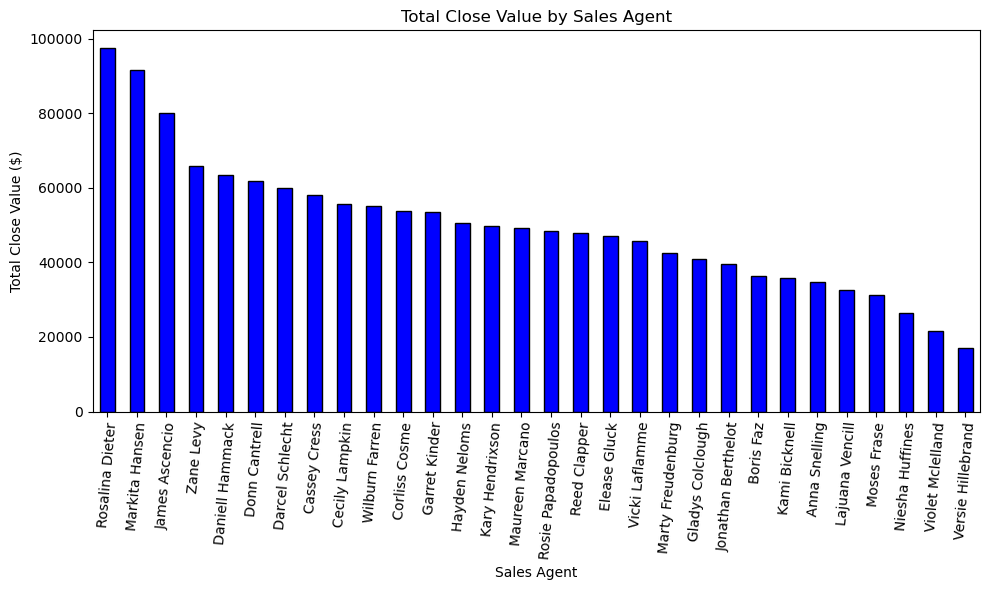

In [149]:
# sales_agent performance based on their close_value
sales_agent_performance = newdf.groupby("Sales_agent")["Close_value"].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sales_agent_performance.plot(kind="bar", color="blue", edgecolor="black")
plt.title("Total Close Value by Sales Agent")
plt.ylabel("Total Close Value ($)")
plt.xlabel("Sales Agent")
plt.xticks(rotation=85)
plt.tight_layout()
plt.show()

The story of sales agent performance unfolds through a bar chart that vividly ranks agents by their total close value. At the top of the 
chart, we see the stars of the team (Rosalina Dieter, Markita Hansen) —those who consistently close high-value deals of over $90000 and drive 
significant revenue. Their strong performance sets the benchmark for success.

As the chart descends, the varying heights of the bars tell a tale of disparity, revealing differences in efficiency, deal sizes, or perhaps 
even opportunity access among agents. This variation invites a closer look at what might be holding others back.

For those at the lower end of the chart, the story shifts to one of opportunity—agents (Versie Hillebrand, Violet Mclelland) with close values 
lower than $30000 who may benefit from training, support, or targeted strategies to boost their performance. This visualization not only celebrates 
the top performers but also sheds light on where efforts can be directed to elevate the entire team's success.

1b. Evaluate product performance to identify those contributing the most to revenue and pinpoint underperforming ones.

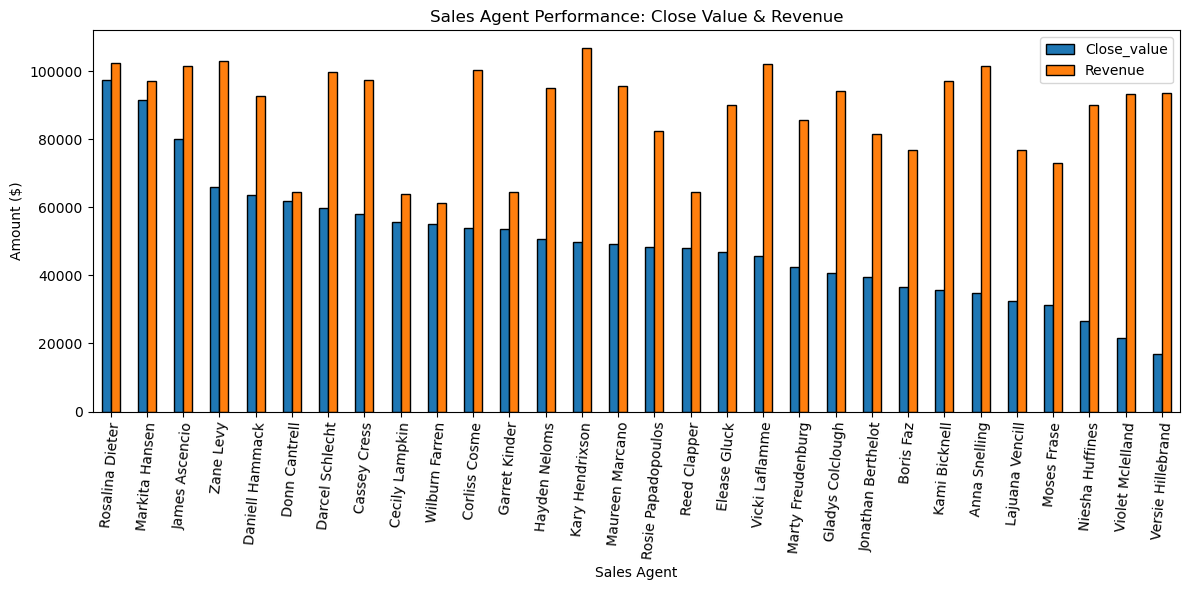

In [152]:
# Grouping by Sales_agent and aggregating both Close_value and Revenue
sales_agent_performance = newdf.groupby("Sales_agent")[["Close_value", "Revenue"]].sum().sort_values(by="Close_value", ascending=False)

# Plotting the bar chart for both Close_value and Revenue
sales_agent_performance.plot(kind="bar", figsize=(12, 6), edgecolor="black")

# Adding labels and title
plt.title("Sales Agent Performance: Close Value & Revenue")
plt.ylabel("Amount ($)")
plt.xlabel("Sales Agent")
plt.xticks(rotation=85)
plt.tight_layout()

# Display the chart
plt.show()

The dynamics of this chart shows the sales agent performance as it comes to life through a bar chart comparing Close Value and Revenue contributions. 
Each sales agent steps into the spotlight, showcasing their impact across these two critical metrics.

At the forefront, top-performing agents (Rosalina Dieter, Markita Hansen) shine brightly, driving both substantial close values and impressive 
revenue figures. Their bars dominate the chart, painting a clear picture of their pivotal role in overall sales success.

As the narrative unfolds, the varying bar heights reveal contrasting performances among agents. Some excel in closing high-value deals but 
generate comparatively modest revenue, suggesting a focus on fewer, larger opportunities. Others contribute steady revenue but with lower 
close values, hinting at a different sales strategy or market segment focus.

This visualization weaves together insights about how agents approach sales, revealing patterns of success and areas where targeted interventions 
could amplify results. It’s a story of achievements, contrasts, and opportunities for growth within the sales team.

2. Segment sectors based on their total revenue contributions to identify high-performing industries and optimize resource allocation.

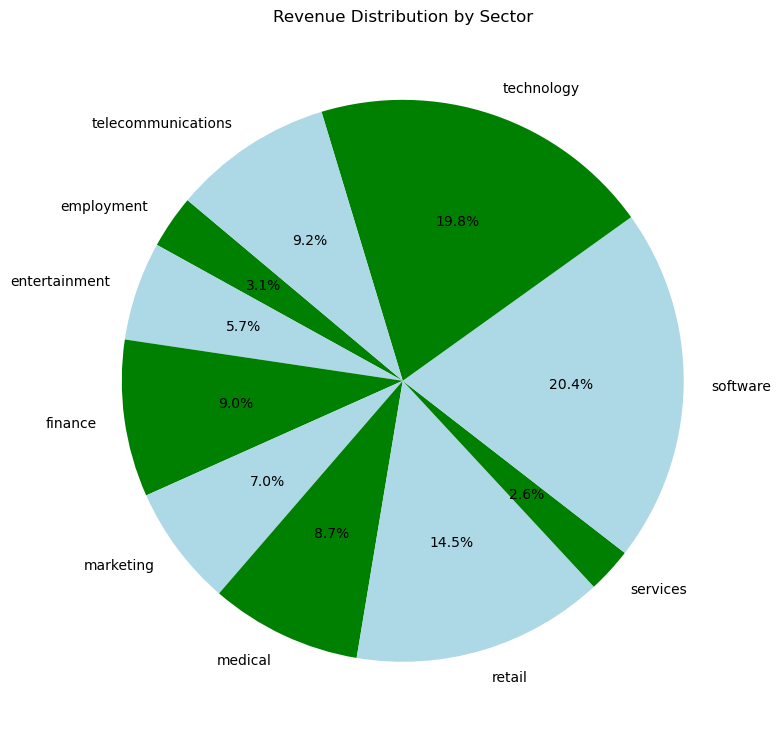

In [155]:
# segment sector based on revenue 
sector_revenue = newdf.groupby("Sector")["Revenue"].sum()

plt.figure(figsize=(8, 8))
sector_revenue.plot(kind="pie", autopct='%1.1f%%', colors=["green", "lightblue"], startangle=140)
plt.title("Revenue Distribution by Sector")
plt.ylabel("")  # Remove default y-axis label
plt.tight_layout()
plt.show()

The pie chart showcases the distribution of earnings across various sectors. Each slice represents a sector’s share of 
the total revenue, painting a vivid picture of market dynamics.

The largest slice stands out, revealing the "software" sector as the dominant sector contributing 20.4% to the total revenue thereby driving 
the majority of revenue. Its prominence underscores its critical role in the organization's success and suggests where efforts might be focused to maintain or grow influence.

Sectors like "employment" and "entertainment" tell their own stories—sectors with modest contributions but potential for growth. They hint at 
opportunities for diversification or strategic investment to expand revenue streams.

This visualization narrates the balance between strongholds and emerging markets, guiding decisions on resource allocation and sector-specific 
strategies to optimize overall performance.

3. Evaluate product performance to identify those contributing the most to revenue and pinpoint underperforming ones.

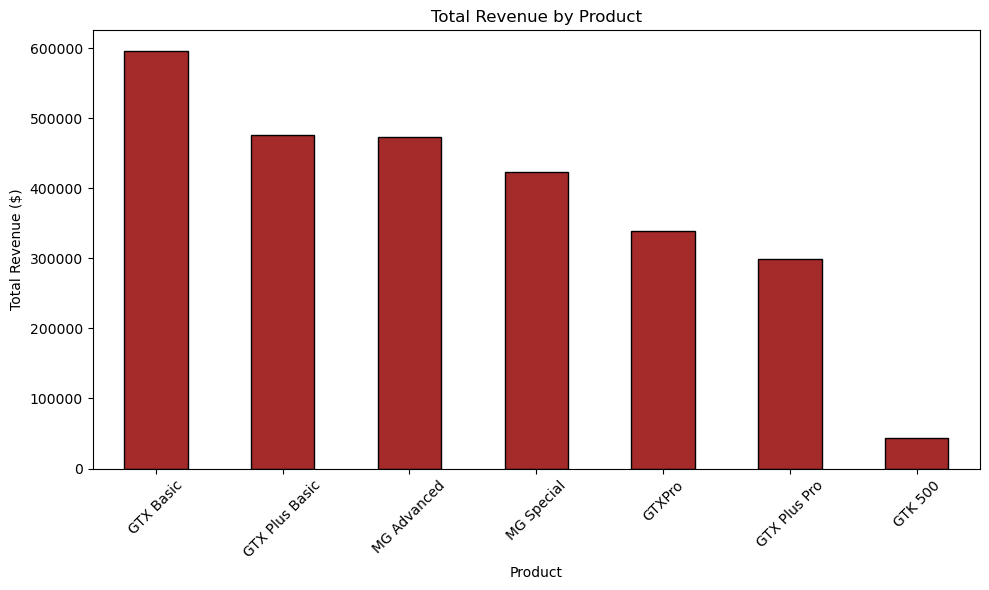

In [158]:
# Product Contribution: Total Close Value by Product
product_contribution = newdf.groupby("Product")["Revenue"].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
product_contribution.plot(kind="bar", color="brown", edgecolor="black")
plt.title("Total Revenue by Product")
plt.ylabel("Total Revenue ($)")
plt.xlabel("Product")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The chart above shows the product contributions through a bar chart, where each product takes the stage, showcasing its revenue impact. 
The tallest bars highlight the star performers—products, GTX Basic that generate the highest revenue and serve as key drivers of the business's success.

Products with shorter bars like GTK 500 hint at areas of untapped potential or underperformance. These might represent niche offerings, new entrants, 
or opportunities for improvement through better marketing or refinement.

The clear ranking of products offers a strategic roadmap, helping decision-makers focus on expanding high-performing products while re-evaluating 
or enhancing those with lower contributions. This visualization provides a blueprint for aligning product offerings with revenue growth goals.

RECOMMENDATIONS

1. Focus on Top-Performing Sales Agents: Invest in replicating the strategies of high performers to boost team-wide efficiency.
2. Target High-Revenue Sectors: Allocate more resources and tailored strategies to sectors generating the most revenue.
3. Promote High-Impact Products: Prioritize marketing and sales efforts for products with significant revenue contributions.
4. Support Underperforming Areas: Provide training for low-performing agents and evaluate low-revenue sectors and products for improvement or reallocation.

REFLECTION

If I had more time to complete the project, I would dive deeper into the analysis by exploring additional factors that could impact sales 
performance, such as customer demographics, sales cycle length, and seasonality trends. I would also conduct a more detailed segmentation of sales agents based on performance metrics to identify specific areas for improvement, and perhaps incorporate predictive analytics to forecast future sales trends. Additionally, I would expand the analysis to include a comparative study across different time periods to uncover any shifts or patterns in sales agent performance, sector growth, and product demand.